In [1]:
import spacy
nlp=spacy.load("en_core_web_lg")
from spacy.lang.en.stop_words import STOP_WORDS
list1=["Party","Contracting","Paragraph","i","ii","iii","Article","Parties"]
for item in list1:
    nlp.Defaults.stop_words.add(item)

In [2]:
import os
import re
FET_list=os.listdir("BIT text/FET")
FET_list=[name for name in FET_list if name !="United States.txt"]
pattern="(\w*\s?\w*)\.txt"
def BITprocessor(text,country):
    processing=nlp(text)
    extraction=[token.lemma_ for token in processing if token.text not in STOP_WORDS and token.is_punct == False and token.is_stop == False and token.text!="\n" and token.is_digit==False and len(token.text)>1 and token.is_alpha==True]
    extraction2=' '.join(extraction)
    document=nlp.make_doc(extraction2)
    name=re.findall(pattern,country)
    return document, name[0]
textUS=open("BIT text/FET/United States.txt",encoding="utf8",mode="r").read() 
documentUS, name_US=BITprocessor(textUS,country="United States.txt")   

In [3]:
spacy_similarity_score_US=[]
country_name=[]
FET_processed=[]
for country_n in FET_list:
    text=open("BIT text/FET/{}".format(country_n),encoding="utf8",mode="r").read()
    document, name = BITprocessor(text,country="BIT text/FET/{}".format(country_n))
    score = document.similarity(documentUS)
    FET_processed.append(document.text)
    country_name.append(name)
    spacy_similarity_score_US.append(score)

In [4]:
print(FET_processed)
print(country_name)

['shall accord investment investor fair equitable treatment constant protection security shall unduly discriminatory impair management operation maintenance use enjoyment sale liquidation investment investor shall unduly discriminatory impair management operation maintenance use enjoyment sale liquidation investment investor shall accord investor investment return treatment favourable accord investor investment investor country investment return respect management operation maintenance use enjoyment sale liquidation dispute settlement investment return whichever favourable investor provision Agreement shall construe prevent take action pursuance obligation United Nations Charter maintenance international peace security prevent fulfil obligation member economic integration agreement free trade area customs union common market economic community monetary union European Union oblige extend investor investment return present future benefit treatment preference privilege virtue membership a


['Austria', 'Azerbaijan', 'Canada', 'Czech Republic', 'France', 'Germany', 'Ghana', 'India', 'Luxembourg', 'Mexico', 'Netherlands', 'African Community']


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd


In [6]:
idf=TfidfVectorizer()
freq_matrix=idf.fit_transform(FET_processed)
print(freq_matrix)

  (0, 281)	0.07299634179927383
  (0, 161)	0.06269010627330317
  (0, 89)	0.049705785092629
  (0, 26)	0.07299634179927383
  (0, 255)	0.07299634179927383
  (0, 189)	0.06269010627330317
  (0, 186)	0.07299634179927383
  (0, 304)	0.07299634179927383
  (0, 218)	0.14599268359854767
  (0, 212)	0.14599268359854767
  (0, 35)	0.14599268359854767
  (0, 128)	0.14599268359854767
  (0, 214)	0.12538021254660633
  (0, 113)	0.12538021254660633
  (0, 197)	0.14599268359854767
  (0, 107)	0.07299634179927383
  (0, 188)	0.07299634179927383
  (0, 49)	0.06269010627330317
  (0, 179)	0.07299634179927383
  (0, 48)	0.07299634179927383
  (0, 297)	0.2189890253978215
  (0, 70)	0.07299634179927383
  (0, 24)	0.06269010627330317
  (0, 286)	0.07299634179927383
  (0, 123)	0.07299634179927383
  :	:
  (11, 200)	0.08708074260208687
  (11, 162)	0.17416148520417374
  (11, 257)	0.0747859532892002
  (11, 3)	0.1495719065784004
  (11, 287)	0.06606266144691991
  (11, 222)	0.23718540248979608
  (11, 221)	0.05929635062244902
  (11, 11

In [7]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(freq_matrix)
kmeans.predict(freq_matrix)


array([0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0])

In [8]:
print(country_name)

['Austria', 'Azerbaijan', 'Canada', 'Czech Republic', 'France', 'Germany', 'Ghana', 'India', 'Luxembourg', 'Mexico', 'Netherlands', 'African Community']


In [23]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=5)
NMF_matrix=nmf.fit_transform(freq_matrix)
print(nmf.components_)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00034196 ... 0.         0.         0.        ]
 [0.         0.07726499 0.07423933 ... 0.         0.03663892 0.07726499]
 [0.11165729 0.         0.         ... 0.11165729 0.00146389 0.        ]
 [0.         0.         0.00107482 ... 0.         0.         0.        ]]


In [12]:
print(idf.get_feature_names())

['abroad', 'abuse', 'abusive', 'access', 'accord', 'accordance', 'account', 'accountability', 'action', 'activity', 'addition', 'administrative', 'adopt', 'affect', 'aforementioned', 'agreement', 'alien', 'allege', 'appeal', 'applicable', 'apply', 'appropriate', 'arbitrariness', 'arbitrary', 'area', 'arise', 'arrangement', 'article', 'articles', 'authority', 'authorization', 'auxiliary', 'available', 'bad', 'belief', 'benefit', 'bilateral', 'breach', 'case', 'cause', 'certainty', 'charter', 'circumstance', 'civil', 'claim', 'coercion', 'commensurate', 'commitment', 'common', 'community', 'company', 'complement', 'concept', 'conduct', 'consider', 'consideration', 'constant', 'constitute', 'construe', 'content', 'contrary', 'convention', 'corrupt', 'country', 'court', 'cover', 'covered', 'create', 'criminal', 'customary', 'customs', 'damage', 'date', 'de', 'decide', 'decision', 'declaration', 'denial', 'deny', 'determination', 'development', 'differential', 'direct', 'directly', 'disadva

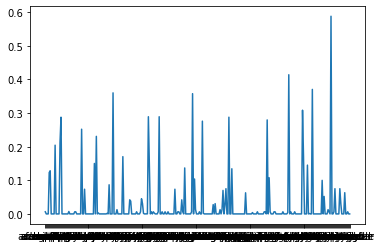

In [16]:
import matplotlib.pyplot as plt
plt.plot(idf.get_feature_names(),nmf.components_[0])
plt.show()

In [24]:
test=pd.Series(nmf.components_[1],index=idf.get_feature_names())

In [25]:
print(test.nlargest(10))

investor       0.378036
return         0.350973
investment     0.317047
shall          0.307254
state          0.294281
accord         0.225353
favourable     0.206982
treatment      0.179162
maintenance    0.176389
territory      0.169641
dtype: float64
